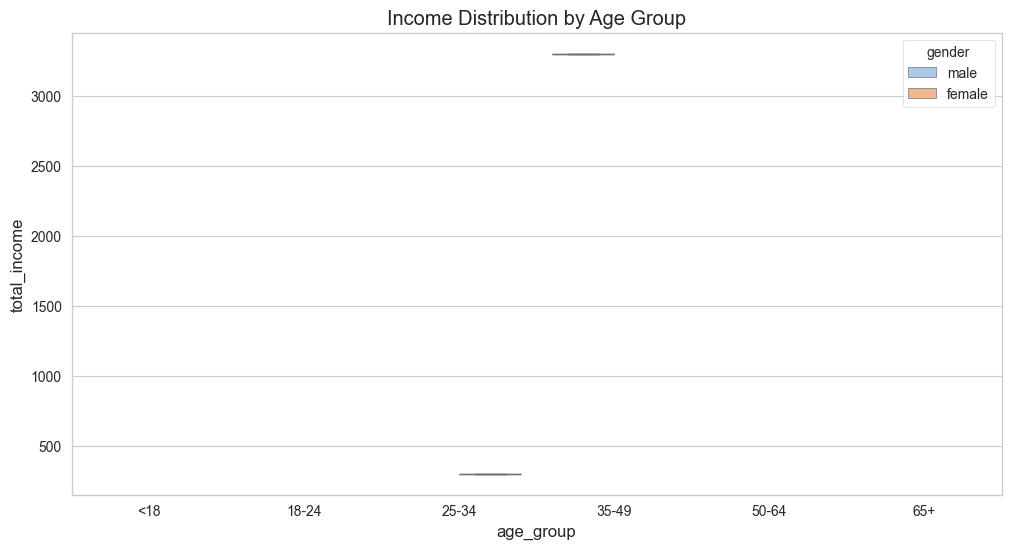

<Figure size 1200x600 with 0 Axes>

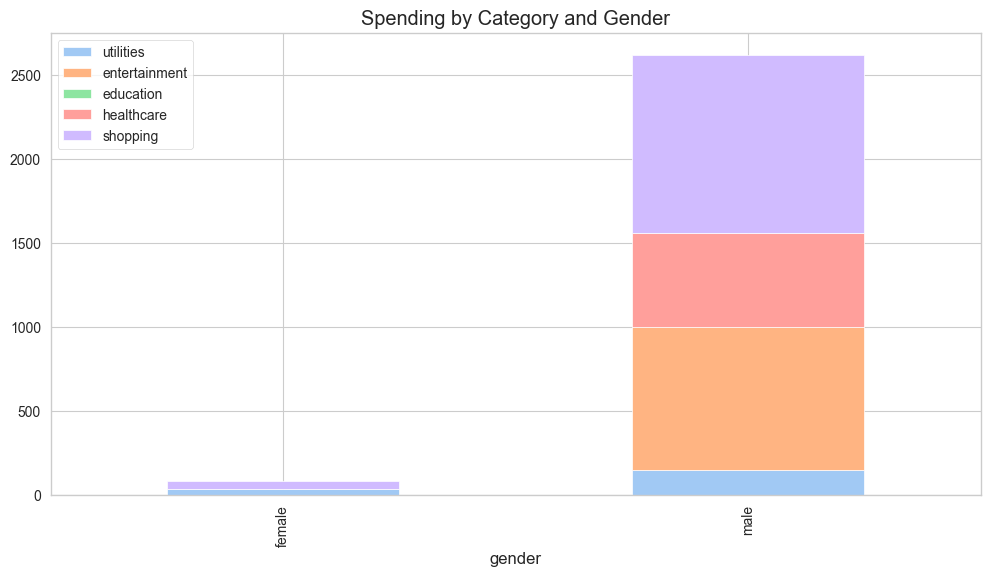

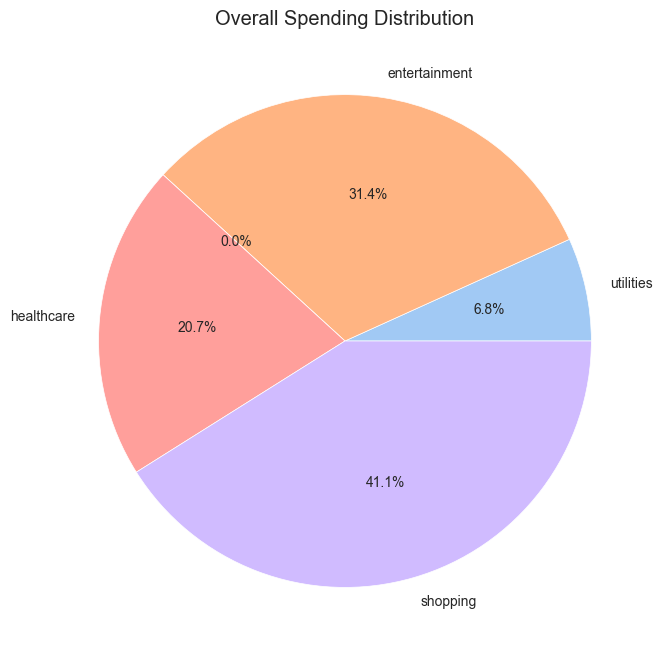

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Setting up visualization style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

# Loading data
CSV_FILE_PATH = 'survey_data.csv'
if not os.path.exists(CSV_FILE_PATH):
    raise FileNotFoundError(f"Data file not found at {CSV_FILE_PATH}")

try:
    df = pd.read_csv(CSV_FILE_PATH)
except pd.errors.ParserError as e:
    raise ValueError(f"CSV parsing error: {e}")

# Data preparation
column_map = {
    'age': ['age'], 
    'gender': ['gender'], 
    'total_income': ['total_income', 'income'],
    'utilities': ['utilities'], 
    'entertainment': ['entertainment'],
    'healthcare': ['healthcare', 'medical'], 
    'education': ['education'],
    'shopping': ['shopping']
}

data = pd.DataFrame({
    k: df[next((col for col in v if col in df.columns), None)] if any(col in df.columns for col in v) else 0
    for k, v in column_map.items()
})

# 1. Income by Age Group Visualization
plt.figure(figsize=(12, 6))
bins = [0, 18, 25, 35, 50, 65, 100]
labels = ['<18', '18-24', '25-34', '35-49', '50-64', '65+']
data['age_group'] = pd.cut(data['age'], bins=bins, labels=labels)
sns.boxplot(data=data, x='age_group', y='total_income', hue='gender', showfliers=False)
plt.title('Income Distribution by Age Group')
plt.show()

# 2. Spending by Category and Gender
plt.figure(figsize=(12, 6))
spending_cols = ['utilities', 'entertainment', 'education', 'healthcare', 'shopping']
data.groupby('gender')[spending_cols].sum().plot(kind='bar', stacked=True)
plt.title('Spending by Category and Gender')
plt.show()

# 3. Spending Pie Chart
plt.figure(figsize=(8, 8))
data[spending_cols].sum().plot.pie(autopct='%1.1f%%', labels=spending_cols)
plt.title('Overall Spending Distribution')
plt.ylabel('')
plt.show()